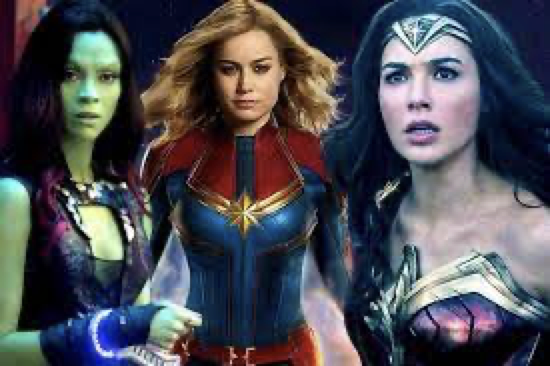

## As we begin the process of exploring data using Python, I will focus my attention on the DC/Marvel dataset. The questions that I would like to find the answers to will be based on some questions that I had after reading the article, "Comic Books are Still Made by Men, For Men, and About Men" that we were assigned for our reflection reading.  


In [70]:
import pandas as pd
import numpy as np

In [71]:
import matplotlib.pyplot as plt

In [72]:
%matplotlib inline

In [73]:
plt.rcParams["figure.figsize"] = (18, 6)

In [74]:
superheroes = pd.read_csv("superhero_data.csv", parse_dates=["FIRST_YEAR"])

In [75]:
superheroes.head()

,UNIVERSE,page_id,name,urlslug,ID,ALIGN,IS_AVENGER,AVENGER_STATUS,AVENGER_YEAR,EYES,HAIR,SEX,SEXUALITY,ALIVE,APPEARANCES,FIRST_MONTH,FIRST_YEAR,DECEASED,RESURRECTED
0,DC,1702,Richard Occult (New Earth),Richard_Occult_(New_Earth),Secret Identity,ND,NO,ND,ND,Grey Eyes,Black Hair,Male Characters,Heterosexual Characters,Living Characters,125,October,1935,ND,ND
1,DC,158200,Arthur Pendragon (New Earth),Arthur_Pendragon_(New_Earth),Public Identity,Good Characters,NO,ND,ND,Brown Eyes,Brown Hair,Male Characters,Heterosexual Characters,Living Characters,41,February,1936,ND,ND
2,DC,289378,Bedivere (New Earth),Bedivere_(New_Earth),ND,ND,NO,ND,ND,ND,ND,Male Characters,Heterosexual Characters,Living Characters,ND,February,1936,ND,ND
3,DC,11333,Franklin Delano Roosevelt (New Earth),Franklin_Delano_Roosevelt_(New_Earth),Public Identity,Good Characters,NO,ND,ND,ND,Grey Hair,Male Characters,Heterosexual Characters,Living Characters,52,March,1936,ND,ND
4,DC,342641,Gareth (New Earth),Gareth_(New_Earth),ND,ND,NO,ND,ND,ND,ND,Male Characters,Heterosexual Characters,Living Characters,1,February,1936,ND,ND


In [76]:
print ("Total number of characters in the superhero dataset " + str(len(superheroes)))

Total number of characters in the superhero dataset 23420


In [77]:
super_gender=superheroes["SEX"].value_counts()
print(super_gender)

Male Characters           16420
Female Characters          5803
ND                          978
Male Character              101
Female Character             50
Agender Characters           45
Genderless Characters        20
Genderfluid Characters        2
Transgender Characters        1
Name: SEX, dtype: int64


### Below is the number of Marvel and DC Characters by Gender.  My first question is:  How many male characters are there vs. female characters?

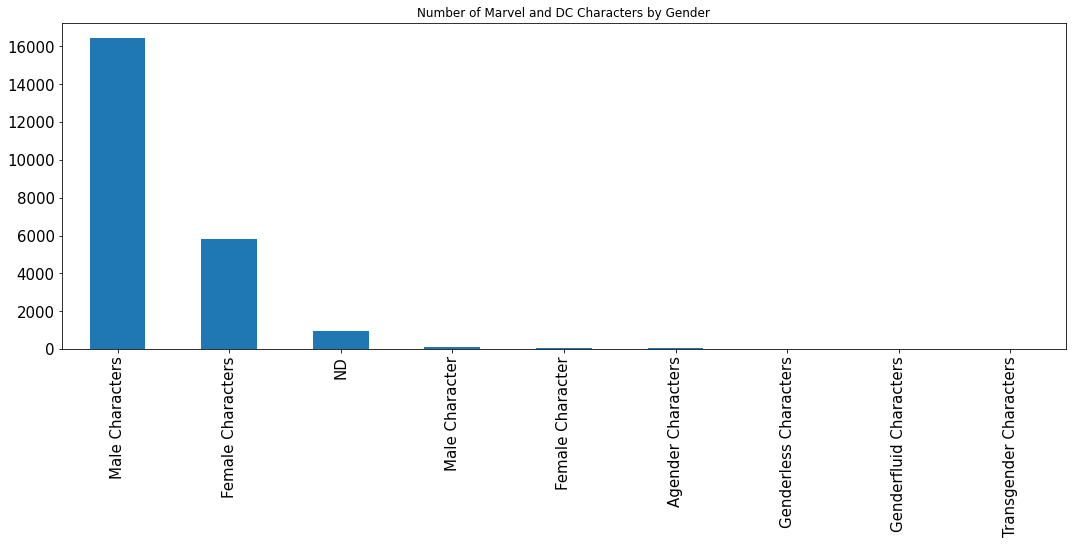

In [78]:
super_gender.plot(kind="bar", fontsize =15)

plt.title("Number of Marvel and DC Characters by Gender")
plt.show()

### I will begin by removing the null data from the data set.  

In [79]:
dropGender = superheroes.drop(superheroes[superheroes.SEX == "ND"].index)
femalesnoND = dropGender["SEX"].value_counts()

### I want to focus my evaluation of this data just on males and females so I will drop all other genders other than those two.  The dropping of this data is not because any of the other "SEX" designations are not important.  My focus is only on male vs. female due to some of the issues that became apparent after reading the article that we were assigned for our reflection reading.  The disparity between males and females is a big deal in medicine too which is my area of concern.  

### As such, I will begin to drop all other "SEX" designations:

### Drop "Agender Characters"

In [80]:
dropGender2 = dropGender.drop(dropGender[dropGender.SEX == "Agender Characters"].index)
minus_agender = dropGender2["SEX"].value_counts()

### Drop "Genderless Characters"

In [81]:
dropGender3 = dropGender2.drop(dropGender2[dropGender2.SEX == "Genderless Characters"].index)
minus_agender2 = dropGender3["SEX"].value_counts()

### Drop "Genderfluid Characters"

In [82]:
dropGender4 = dropGender3.drop(dropGender3[dropGender3.SEX == "Genderfluid Characters"].index)
minus_agender3 = dropGender4["SEX"].value_counts()

### Drop "Transgender Characters"

In [83]:
dropGender5 = dropGender4.drop(dropGender4[dropGender4.SEX == "Transgender Characters"].index)
minus_agender4 = dropGender5["SEX"].value_counts()

### In the following cell, I used the "dropGender5" data and then combined "Female Character" with "Female Characters" and "Male Character" with "Male Characters" so that in the end, I was just looking at male and female characters.  The bar graph represent value counts and thus is labeling the graph as true/false.  In this instance the true=males and false=females because of how the code was written.  I have tried to rename this so that it would read "male"/"female" instead but have been unable to do so.  

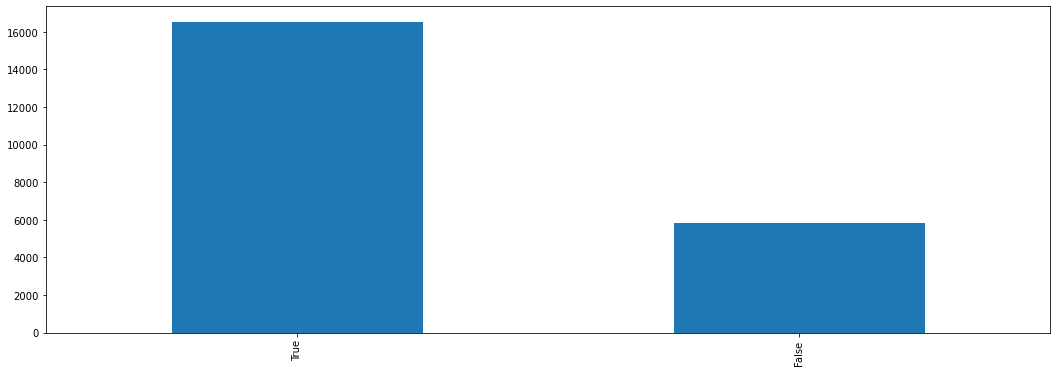

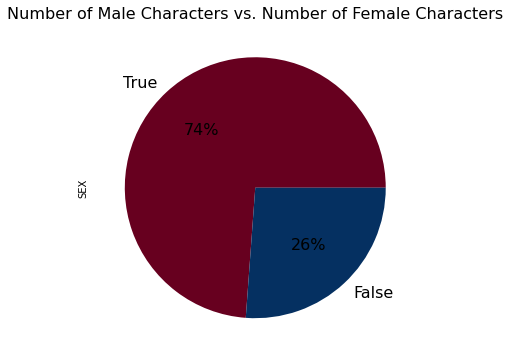

In [84]:
female1= dropGender5["SEX"]=="Female Character"
female2= dropGender5["SEX"]=="Female Characters"

male1= dropGender5["SEX"]=="Male Character"
male2= dropGender5["SEX"]=="Male Characters"


female_clean= female1.combine(female2, max)
male_clean= male1.combine(male2, max)

male_cleanvc= male_clean.value_counts()
male_cleanvc.plot(kind="bar")
plt.show()

male_cleanvc.plot(kind="pie", colormap= "RdBu", fontsize = 16, autopct = "%1.0f%%")
plt.title("Number of Male Characters vs. Number of Female Characters", fontsize = 16)
plt.show()


###  Because in the above bar graph, I was unable rename the way it was labeled, I have also included the following crosstab where I decided to "drop" both "Male Character" and "Female Character" from the data set and just leave "Male Characters" and "Female Characters", instead of combining them like I did in the bar graph above.  One could argue that this could sway the argument one way or the other but both represented a very small percentage. 

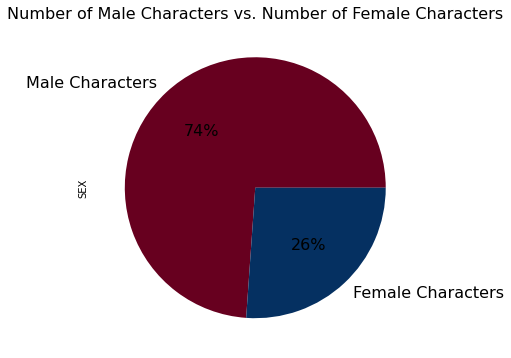

In [85]:
dropGender6 = dropGender5.drop(dropGender5[dropGender5.SEX == "Male Character"].index)
dropGender7 = dropGender6.drop(dropGender6[dropGender6.SEX == "Female Character"].index)
clean_malefemale = dropGender7["SEX"].value_counts()

clean_malefemale.plot(kind="pie", colormap= "RdBu", fontsize = 16, autopct = "%1.0f%%")
plt.title("Number of Male Characters vs. Number of Female Characters", fontsize = 16)
plt.show()



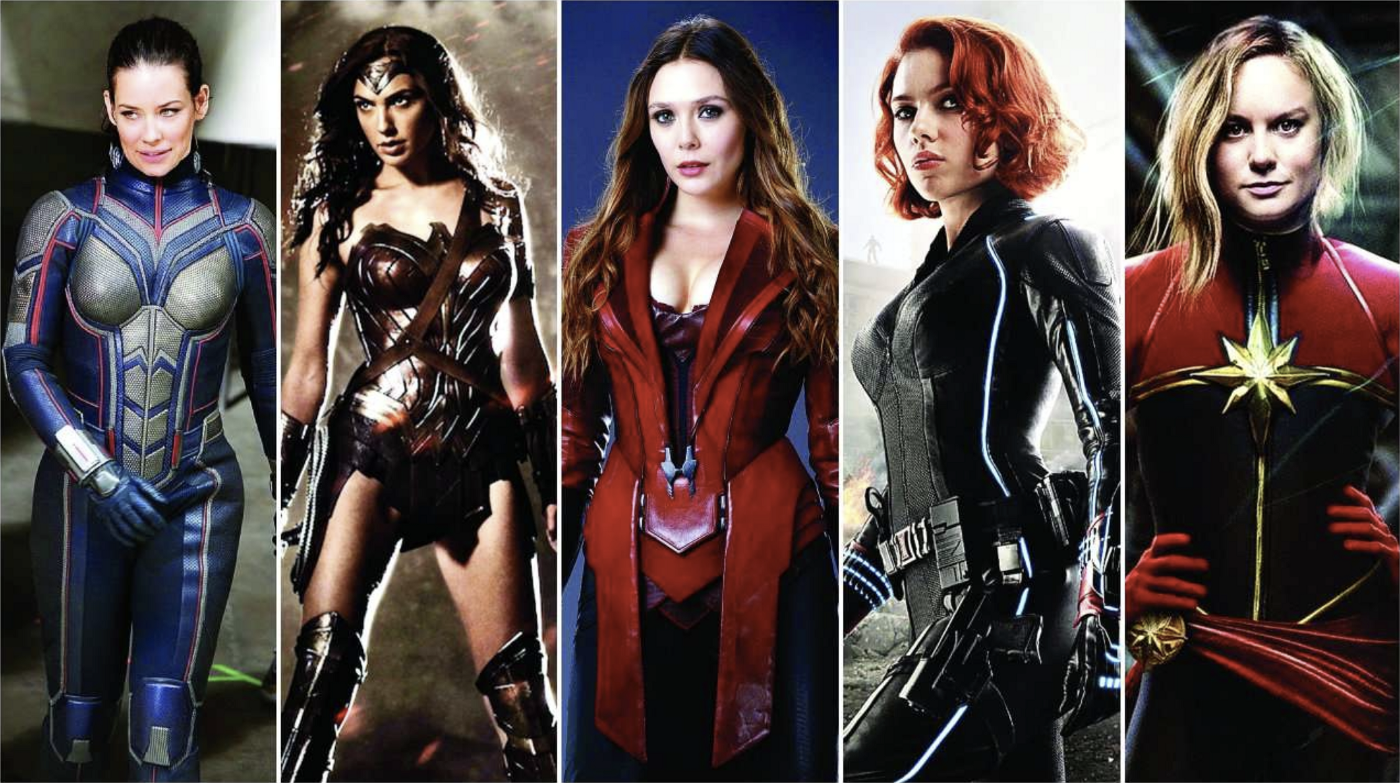

### As you can see, there is a huge disparity between male and female characters.  One would hope that now that there is much more awareness of this, we can attain at least a 50/50 balance.  According to statista.com, in 2020, women make up 51.1% of the U.S. population.  You would hope that in all movies, literature, etc. we are able to see the gender ratio presented in films, at least as equal to that of the actual population.  I believe that some of the thoughts/stereotypes of women have exacerbated the problem, especially when you are refering to/or casting "superheroes."  If women are not seen as at least equal to men, they are certainly not seen as "superheroes" due to their perceived/assumed lack of strength, intelligence, etc.  This becomes even more complicated when all of the people creating the movies, from the writers to the directors and everyone in between, are all male.  I believe this is why we see the following representation: 74% of the DC/Marvel characters are men and 26% are women. This is very interesting to me because it is very much the case in the medical field as well which is my area of concern.  On the sites.psu.edu website, they state that 80-90% of leadership roles in medicine, such as medical school deans, are men. Depending on the specialty, the male to female ratio in doctors is alarmingly high!  In orthopedic surgery, only 4.3% of board certified surgeons are women!

### In the following code, you are able to see the cleaned "male"/"female" data and whether they are still alive or not?  The question I had was, did the creators begin to introduce female characters due to some pressure and then just quickly kill them off?

                    Dead  Alive
Male Characters     4240  12281
 Female Characters  1205   4648


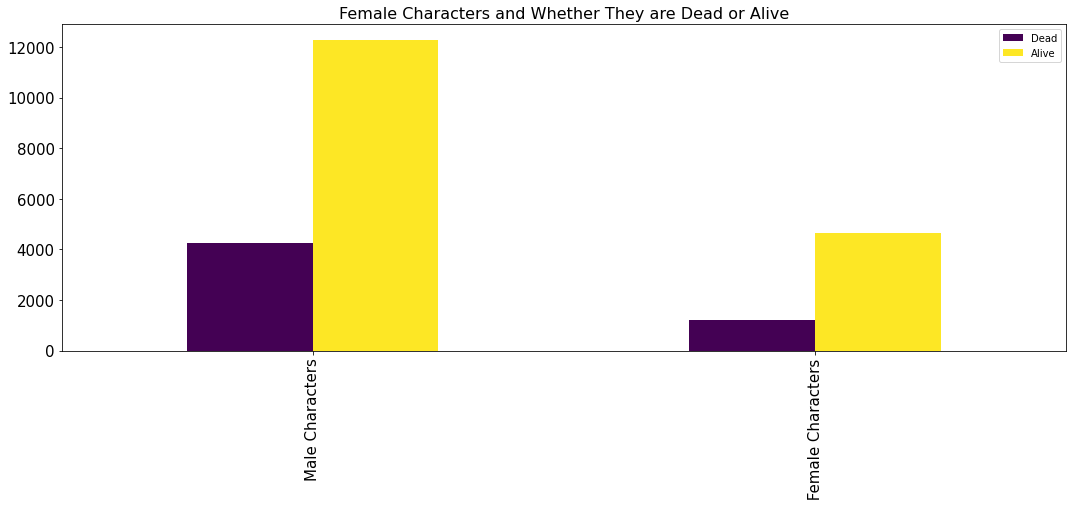

In [86]:
living_female= pd.crosstab(index=female_clean, columns=(superheroes["ALIVE"]=="Living Characters"))
living_female.index= ["Male Characters", " Female Characters"]
living_female.columns=["Dead", "Alive"]
print(living_female)

living_female.plot(kind="bar", colormap="viridis", fontsize =15)
plt.title("Female Characters and Whether They are Dead or Alive", fontsize=16)
plt.show()

### It does not appear that the female characters are more likely to be "killed off" as opposed to male characters.  

### Next, I looked at whether female characters are given "special powers" as often as male characters?  I chose to look at whether they had secret identities or not, as an example of a "special power".  You have the following bar graph as a visual for the results and then I incorporate the code to show the actual percentages.  

        No Secret Identity  Secret Identity
Males                10209             6312
Female                3695             2158


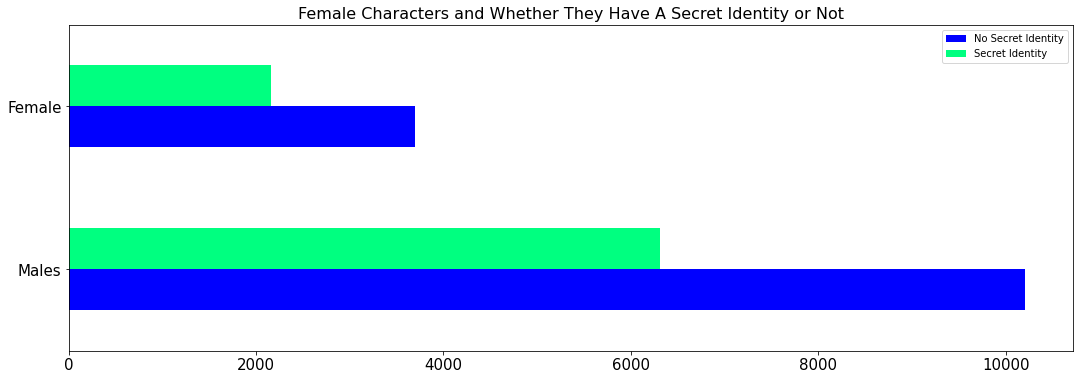

In [87]:
secret_female= pd.crosstab(index=female_clean, columns=(superheroes["ID"]=="Secret Identity"))
secret_female.index= ["Males","Female"]

secret_female.columns=["No Secret Identity", "Secret Identity"]
print(secret_female)
    
secret_female.plot(kind="barh", colormap= "winter", fontsize =15)
plt.title("Female Characters and Whether They Have A Secret Identity or Not", fontsize = 16)
plt.show()

### Does the percentage of female characters with a secret identity differ from the percentage of male characters with a secret identity?

### I got help with the following code from: https://appdividend.com/2021/06/16/how-to-calculate-a-percentage-in-python/ in order to show the corresponding percentages. 

In [88]:
def percentage(part, whole):
  percentage = 100 * float(part)/float(whole)
  return str(percentage) + "%"

print(percentage(2158, 5893) + " of female characters have a secret identity.")    

36.61971830985915% of female characters have a secret identity.


In [89]:
def percentage(part, whole):
  percentage = 100 * float(part)/float(whole)
  return str(percentage) + "%"

print(percentage(3695, 5893) + " of female characters do NOT have a secret identity.")    

62.701510266417785% of female characters do NOT have a secret identity.


In [90]:
def percentage(part, whole):
  percentage = 100 * float(part)/float(whole)
  return str(percentage) + "%"

print(percentage(6608, 17567) + " of 'male' characters have a secret identity.") 

37.61598451642284% of 'male' characters have a secret identity.


In [91]:
def percentage(part, whole):
  percentage = 100 * float(part)/float(whole)
  return str(percentage) + "%"

print(percentage(10959, 17567) + " of 'male' characters do NOT have a secret identity.") 

62.38401548357716% of 'male' characters do NOT have a secret identity.


### It appears that the percentage of characters with a secret identity is very similar whether they are male or female.

# In summary, who are these female Characters that DC/Marvel have created?
### In order to answer this question, I wanted to identify a small group of the female characters who appeared more times than all the rest of the female characters.  The following code gave me the 10 female characters who appeared more than 1000 times.  I wanted to look at these 10 women more closely.  There are 23420 characters in this data set.  What is unique about these 10 females?  Is there something similar about these 10 women who appeared more than any other?  I chose to focus on how they look (are presented to the audience).  The following is: who these females are (their names), what color hair they have, and what color eyes they have.  

['1231', '1028', '1713', '1120', '1107', '1050', '1161', '1304', '1075', '1512']
['Wonder Woman (Diana Prince)', 'GenderTest', 'Susan Storm (Earth-616)', 'Janet van Dyne (Earth-616)', 'Jean Grey (Earth-616)', 'Natalia Romanova (Earth-616)', 'Wanda Maximoff (Earth-616)', 'Mary Jane Watson (Earth-616)', 'Dinah Laurel Lance (New Earth)', 'Ororo Munroe (Earth-616)']
['Blue Eyes', 'Blue Eyes', 'Blue Eyes', 'Blue Eyes', 'Green Eyes', 'Green Eyes', 'Green Eyes', 'Green Eyes', 'Blue Eyes', 'Blue Eyes']
['Black Hair', 'Blond Hair', 'Blond Hair', 'Auburn Hair', 'Red Hair', 'Red Hair', 'Brown Hair', 'Red Hair', 'Blond Hair', 'White Hair']
('1075', '1028', '1120', '1107', '1304', '1050', '1512', '1713', '1161', '1231')


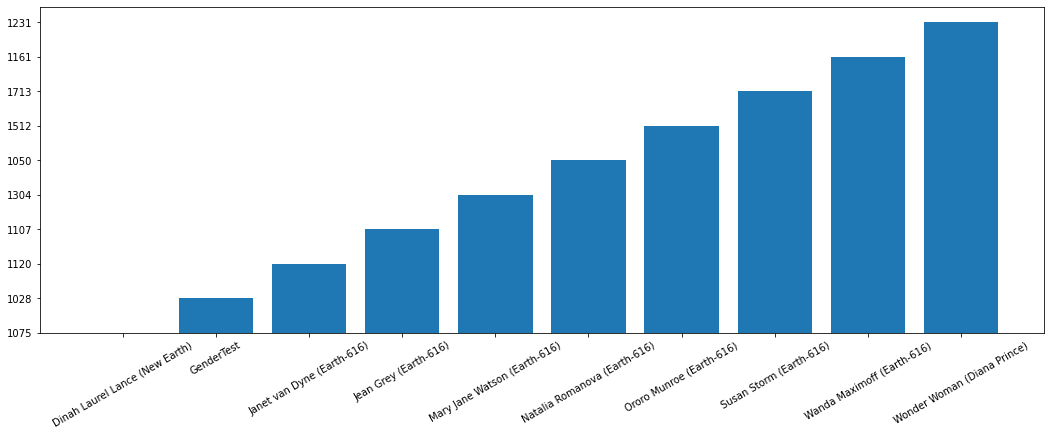

Blue Eyes     6
Green Eyes    4
dtype: int64
Blond Hair     3
Red Hair       3
Black Hair     1
Auburn Hair    1
Brown Hair     1
White Hair     1
dtype: int64
There are 10 females who have appeared more than 1000 times and they are listed above.


In [92]:
import csv
file = open("superhero_data.csv", "r")
reader = csv.reader(file)
next(reader)

female1000=[]
female1000eyes=[]
female1000appearances=[]
female1000hair=[]

for row in reader:

    if row[14]=="ND":
        continue

    elif int(row [14])> 1000 and (row[11]=="Female Characters"):
    
        female1000.append(row[2])
        female1000eyes.append(row[9])
        female1000appearances.append(row[14])
        female1000hair.append(row[10])
        
        
print (female1000appearances)       
print(female1000)
print(female1000eyes)
print(female1000hair)

female1000appearances, female1000=zip(*sorted(zip(female1000,female1000appearances)))
print(female1000)

plt.bar(female1000appearances, female1000)
plt.xticks(rotation=30)
plt.show ()

countsfemeyes= pd.Series(female1000eyes).value_counts()
print(countsfemeyes)

countsfemhair= pd.Series(female1000hair).value_counts()
print(countsfemhair)
print ("There are " + str(len(female1000)) + " females who have appeared more than 1000 times and they are listed above.")

### The above bar graph shows you the females character's names and how often they appeared.  You can see that Wonder Woman appeared the most, with 1231 appearances.  Interestingly, all 10 women have either blue or green eyes, none of them had brown, black or any other color eyes.  Is this significant?  It could suggest that while the creators are slowly including female characters into these ginormous story lines, these females still do not accurately represent the "normal" population.  

### According to the "Medical News Today" article I have cited, 70%-79% of the world's population have brown eyes, 8-10% have blue eyes, and only 2% have green eyes.  As I mentioned above, if the goal is to have equal gender representation amongst these characters, what these females actually look like isn't an actual representation either.  

### If we continue to evaluate what these female characters look like, let's analyze their hair color:  60% of the female characters who appeared more than 1000 times had either blond or red hair.  According to the BBC news article below, only 1-2% of the world's population have red hair and only 2% of the population are naturally blonde.  Again, these 10 women do not accurately represent the actual population.  One caveat is that the numbers I could find that showed percentages for both eye and hair color were looking at all genders but one could make a reasonable assumption that the percentages would be similar.  

### In addition, in this short list of female characters who have appeared more than 1000 times, all of the female characters who have appeared more than 1000 times are all "good characters" and all but two of them are specifically designated as part of "Earth-616".  The Marvel Universe is said to be part of "Earth-616", a bigger multi-universe. 


### In Summary, the coding that I have learned this semester has allowed me to approach data in a whole new way.  In conjunction with some of the reading reflections, it has taught be to be a better consumer of data and look for potential flaws in what is being presented or how it is being presented.  I hope this particular project allows for people to see that while there is a slow improvement in the addition of more female characters in DC/Marvel movies, we are a long way from there being a close representation of the actual population.  It has inspired me to delve more deeply into the disparity between men and women representation in the medical field as well.

# Acknowledgements

### Shiva Darian, as my professor, who was so patient and helpful all semester long!

### I used the following to learn more about what "Earth-616" referred to
https://www.marvel.com/articles/comics/the-origin-story-of-earth-616-as-told-by-its-creator-writer-david-thorpe

### Other websites that were used in the male/female discussion presented here:

https://scholarworks.unr.edu/handle/11714/3607

https://digitalcommons.assumption.edu/cgi/viewcontent.cgi?article=1079&context=honorstheses

https://www.medicalnewstoday.com/articles/eye-color-percentage

https://www.bbc.com/news/magazine-24331615

https://www.factretriever.com/blonde-hair-facts

#### I would like to add a disclaimer with regards to the data itself.   Obviously we are limited in some ways by the data itself and we are relying on it's creators for it's accuracy.  All of what I presented here is true only so much that the actual data is true.  My hope is by cleaning the null data and combing the 'like' characters, we have made it more functional for the sake of this project.  